Monte Carlo Module Demo Scenarios  
Rishi Sharma  
DS5100 Spring 2023  


In [33]:
import montecarlo as mc
import pandas as pd
import matplotlib.pyplot as plt


# Scenario 1: A 2-headed coin  

Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.  

Play a game of 1000 flips with all fair dice.  

Play a game of 1000 flips with two unfair dice and one fair die.  

For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.  

Compute relative frequency as the number of jackpots over the total number of rolls.  

Show your results, comparing the two relative frequencies, in a simple bar chart.

In [34]:
#Create the 2 types of coins. Change the weight of the unfair coin.
fairc = mc.Die(['H','T'])
unfairc = mc.Die(['H','T'])
unfairc.change_weight('H',5)



In [35]:
#Play the game 1000 times for each 3-coin group
faircgame = mc.Game([fairc,fairc,fairc])
unfaircgame = mc.Game([unfairc,unfairc,fairc])

faircgame.play(1000)
unfaircgame.play(1000)



In [36]:
#Analyze jackpots for both fair and unfair game
faircalyze = mc.Analyzer(faircgame)
unfaircalyze = mc.Analyzer(unfaircgame) 

faircjpsfreq = faircalyze.jackpot() / 1000
unfaircjpsfreq = unfaircalyze.jackpot() / 1000



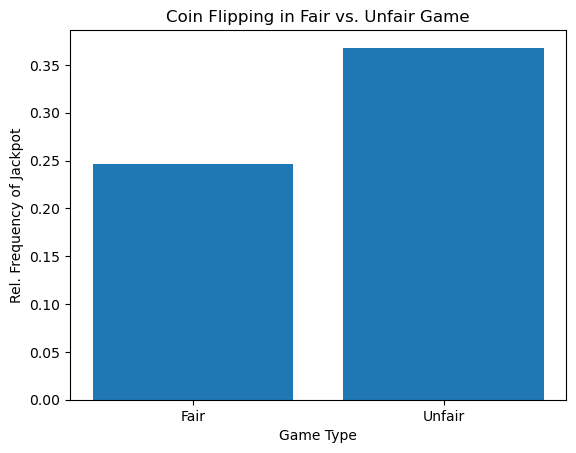

In [37]:
#Show relative frequencies of jackpots in bar chart
bardata = [faircjpsfreq,unfaircjpsfreq]
plt.bar(["Fair","Unfair"],bardata)
plt.xlabel("Game Type")
plt.ylabel("Rel. Frequency of Jackpot")
plt.title("Coin Flipping in Fair vs. Unfair Game")
plt.show()


# Scenario 2: A 6-sided die   

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the
others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.    

Play a game of 10000 rolls with 5 fair dice.  

Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.  

For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results,
comparing the two relative frequencies, in a simple bar chart.  

Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [38]:
#Create the 3 dice
diefair = mc.Die([1,2,3,4,5,6])
dietype1 = mc.Die([1,2,3,4,5,6])
dietype2 = mc.Die([1,2,3,4,5,6])

dietype1.change_weight(6,5)
dietype2.change_weight(1,5)



In [39]:
#Play the 2 games
fair_d_game = mc.Game([diefair,diefair,diefair,diefair,diefair])
fair_d_game.play(10000)

unfair_d_game = mc.Game([dietype1,dietype1,dietype2,diefair,diefair])
unfair_d_game.play(10000)



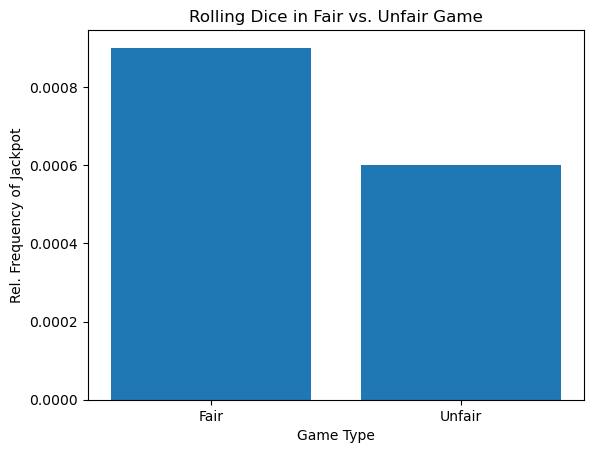

In [40]:
#Obtain the relative frequencies of jackpots for each game 
fair_d_alyze = mc.Analyzer(fair_d_game)
unfair_d_alyze = mc.Analyzer(unfair_d_game)

fair_d_jps_freq = fair_d_alyze.jackpot() / 10000 
unfair_d_jps_freq = unfair_d_alyze.jackpot() / 10000 

#Show relative frequency of each game in bar chart
bardata = [fair_d_jps_freq, unfair_d_jps_freq]
plt.bar(["Fair","Unfair"],bardata)
plt.xlabel("Game Type")
plt.ylabel("Rel. Frequency of Jackpot")
plt.title("Rolling Dice in Fair vs. Unfair Game")
plt.show()



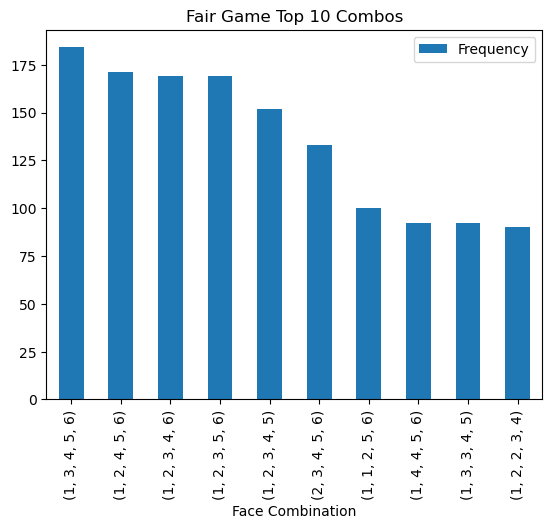

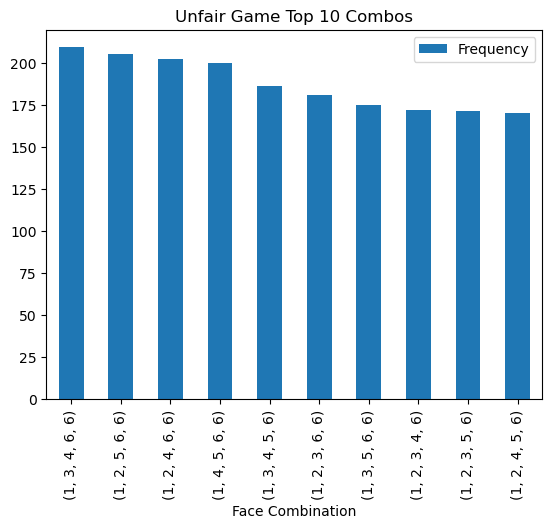

In [41]:
#Obtain top 10 combos for fair and unfair game
fair_d_alyze.combo()
unfair_d_alyze.combo()

top10_fair = fair_d_alyze.combo_df.head(10)
top10_unfair = unfair_d_alyze.combo_df.head(10)

#Plot top10 fair game face combos
top10_fair.plot(y='Frequency', kind='bar')
plt.title('Fair Game Top 10 Combos')	
plt.xlabel("Face Combination")
plt.show()

#plot top10 unfair game face combos
top10_unfair.plot(y='Frequency', kind='bar')
plt.title('Unfair Game Top 10 Combos')
plt.xlabel("Face Combination")
plt.show()



# Scendario 3: Letters of the Roman Alpha  

Create a "die" of letters from a to z with weights based on their frequency of usage.  

Play a game involving 5 of these dice with 1000 rolls.  

How many combos can you that look like actual English words? NOTE: "combo" here just means resulting sequence,  
not literally combination as opposed to permutation.  

Based on your eye count, what is the relative frequency of these words versus the rest?  

Note: the Notebook will supply the weights for the letters.

In [42]:
# Import txt file with letters and weights
alphabet=pd.read_csv('letter_weights.txt', sep=' ', header=None, names=['Letter', 'Weights'])
alphabet

# Create lists of letters and weights too be faces and weights of die, respectively
letters = list(alphabet['Letter'])
weights = list(alphabet['Weights'])

# Create Die of letters
letter_die = mc.Die(letters)

# For each letter in the alphabet, apply the weight to corresponding letter
for i in range(0,26):
    letter_die.change_weight(alphabet['Letter'][i],alphabet['Weights'][i])




In [43]:
# Create and play the game 1000 times
letter_game = mc.Game([letter_die,letter_die,letter_die,letter_die,letter_die])

letter_game.play(1000)



In [44]:
# Analyze the game and get a data frame of unique combos
letter_alyze = mc.Analyzer(letter_game)

letter_alyze.combo()

letter_combo_df = letter_alyze.combo_df

#Code for unique combos data frame is at end to not disrupt the flow of this block.

# Relative frequency of real words
print(4/10000)

#Relative frequency of these words is .0004



0.0004


The below code will display a very long data frame with all combos. 

There are about 4 combos that resemble a real English word in this data frame (Ex, "DOORT" is like "DOOR"),  
however, this is a nearly uncountable manual task for roughly 970 unique combos, especially as they change  
with every run of the code file.  

The relative frequency based on the eye test of the data frame was roughly .0004

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',1)
display(letter_combo_df)

Frequency
0 1 2 3 4           
A A R S T  3        
  C E O O  3        
  E L O T  3        
    N S S  3        
  D E I U  2        
E E T U W  2        
    L S T  2        
  I I O T  2        
A L N R T  2        
E H O R S  2        
A E E R S  2        
E H N N R  2        
C E L O O  2        
A K N R T  2        
  C E N W  2        
  O R S T  2        
C E I M S  2        
A B I S T  2        
  C E L R  2        
  E I O R  2        
C E E R S  2        
E M N N S  2        
A C E E O  2        
  I O O T  2        
C I N O T  2        
A A E I L  2        
  D E L S  2        
E I N R S  2        
  F I R T  1        
  E I N N  1        
  F H N W  1        
        X  1        
  E I M S  1        
      L O  1        
      I W  1        
  F H P P  1        
    I N N  1        
      S U  1        
    H I W  1        
    I T Y  1        
  E H Q S  1        
  F J P R  1        
  E H O U  1        
  F K P U  1        
    O P R  1        
        Z  1        
  G I L V  1        
  E H O S  1        
  G I M O  1        
  F H N O  1        
  E L N O  1        
        T  1        
    N N N  1        
    L O R  1        
    K W Y  1        
    L O W  1        
    K N U  1        
    L R S  1        
      S S  1        
    J O S  1        
    L S Y  1        
    I R T  1        
        R  1        
    N N R  1        
    R S W  1        
    N O P  1        
  G I M R  1        
  E I O U  1        
    N R S  1        
    O O S  1        
    I O T  1        
        O  1        
    O R R  1        
    I N R  1        
    O R S  1        
    N O V  1        
  G O O U  1        
    I N U  1        
      S V  1        
  I I O Y  1        
      R T  1        
        U  1        
    L L O  1        
      M M  1        
      N P  1        
        R  1        
        S  1        
      O S  1        
      P T  1        
      R S  1        
    M N S  1        
      O T  1        
        Y  1        
      P S  1        
        T  1        
      T V  1        
    N O P  1        
        Q  1        
        S  1        
        U  1        
      R R  1        
      S U  1        
      U Z  1        
      V Y  1        
    I O S  1        
        R  1        
      L U  1        
  H H N S  1        
  G L R S  1        
    M S U  1        
    N N T  1        
      P W  1        
      R T  1        
  E H N N  1        
  G O V Y  1        
    P V W  1        
    R S S  1        
    T T U  1        
  H H I I  1        
      O S  1        
    O R Y  1        
    H P V  1        
    I L S  1        
      N T  1        
      O R  1        
      S V  1        
      T U  1        
    L N Y  1        
    M O P  1        
    N R S  1        
    O O S  1        
        T  1        
  E H O R  1        
A A A B S  1        
E E H M R  1        
    G N R  1        
D E F T U  1        
    G H T  1        
    H I Y  1        
      L P  1        
      O P  1        
    I I N  1        
        P  1        
      L T  1        
      O S  1        
        V  1        
      R T  1        
      S U  1        
      T T  1        
        Y  1        
    K K Y  1        
    L P V  1        
      T V  1        
    M N T  1        
        Y  1        
    N R S  1        
        Y  1        
      T U  1        
    O S Y  1        
    P T T  1        
    R S T  1        
    S S U  1        
  F G I O  1        
  E F G I  1        
    E R T  1        
      M R  1        
C R R R R  1        
  M P R S  1        
    S S T  1        
  N O R T  1        
      T T  1        
    P R W  1        
    R Y Y  1        
  O O O P  1        
      Q R  1        
      R U  1        
    P S T  1        
    R R T  1        
    S T W  1        
  R S U U  1        
D E E L N  1        
C T T U Y  1        
D D E I T  1        
    H S Y  1        
    I I M  1        
    L N T  1        
      O U  1        
      T T  1        
    M O R  1        
